## 1. La legge dei grandi numeri

La legge dei grandi numeri è un teorema fondamentale della teoria della probabilità che indica che se ripetiamo molte volte (tendendo all'infinito) lo stesso esperimento, la frequenza di un certo evento tende ad essere costante.

Vale a dire, **la legge dei grandi numeri indica che se lo stesso test viene eseguito ripetutamente (ad esempio, lancio di una moneta), la frequenza con cui si ripeterà un determinato evento (testa/croce) si avvicinerà a una costante. Questa a sua volta sarà la probabilità che questo evento si verifichi.**

Fonte: https://it.economy-pedia.com/11038376-law-of-the-big-numbers

- Scrivere una funzione che simula il lancio di una moneta per N volte e restituisce la frequenza % di volte che è uscita testa.
- Calcolare la frequenza % con la grandezze del campione (numero di lanci) che varia 100 volte da 10 a 20000. Ottengo quindi 100 valori.
- Fare il plot del Numero medio di teste (y) rispetto alla grandezza del campione (x)





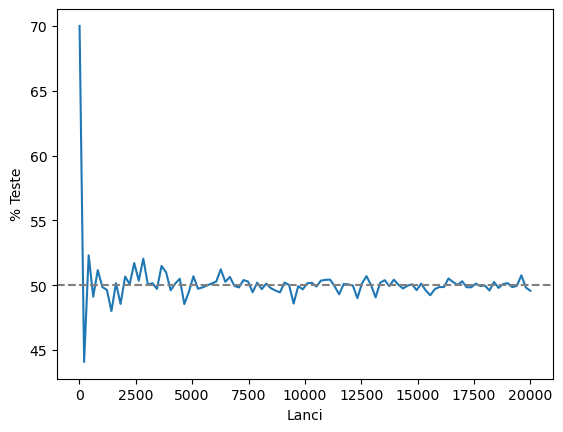

In [1]:
import numpy as np
import matplotlib.pyplot as plt

campioni = np.linspace(10, 20000, 100, dtype=int)
percentuali = []

for n in campioni:
    lanci = np.random.choice(["Testa", "Croce"], n)
    teste = np.sum(lanci == "Testa")
    percentuale = teste / n * 100
    percentuali.append(percentuale)

plt.plot(campioni, percentuali)
plt.axhline(50, color='gray', linestyle='--')
plt.xlabel("Lanci")
plt.ylabel("% Teste")
plt.show()


## 2. Analisi del Dataset Titanic
- Quante righe e colonne ha il dataset?
- Controlla quanti valori mancanti ci sono per colonna
- Riempi i valori mancanti nella colonna 'Embarked' con il valore più frequente
- Rimuovi le righe dove il valore di 'Age' è mancante
- Controlla se ci sono righe duplicate
- Calcola l'età media dei passeggeri per ogni classe (`Pclass`), se ci sono valori mancanti di età riempili con il valore medio
- Visualizza la distribuzione dell'età per classe
- Visualizza la distribuzione dell'età per classe dividendo e mmostrando insieme i dati di uomini e donne

n_righe, n_colonne: (891, 12)

Valori nulli:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Età media per classe:
1a classe: 38.23
2a classe: 29.88
3a classe: 25.14


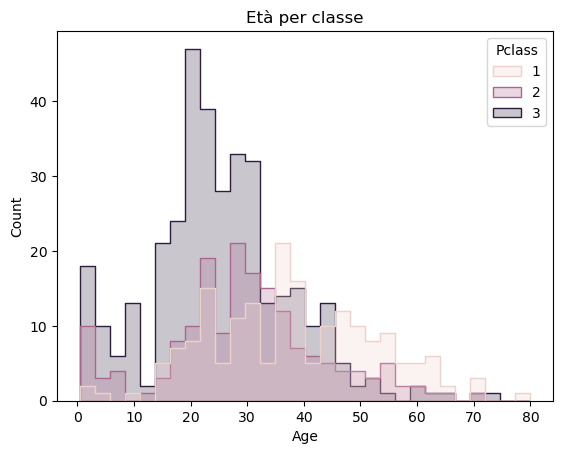

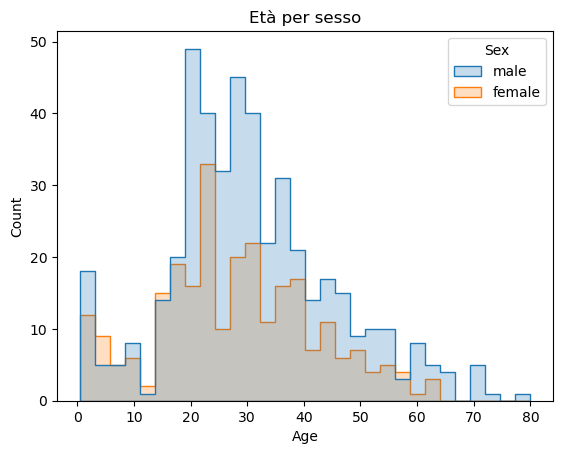

In [3]:
# 📦 Caricamento del dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)
df.head()

print("n_righe, n_colonne:", df.shape)

print("\nValori nulli:")
print(df.isnull().sum())

più_comune = df["Embarked"].mode()[0]
df["Embarked"] = df["Embarked"].fillna(più_comune)

df = df.dropna(subset=["Age"])

df = df.drop_duplicates()

età_1 = df[df["Pclass"] == 1]["Age"].mean()
età_2 = df[df["Pclass"] == 2]["Age"].mean()
età_3 = df[df["Pclass"] == 3]["Age"].mean()
print("\nEtà media per classe:")
print("1a classe:", round(età_1, 2))
print("2a classe:", round(età_2, 2))
print("3a classe:", round(età_3, 2))
df.loc[(df["Pclass"] == 1) & (df["Age"].isnull()), "Age"] = età_1
df.loc[(df["Pclass"] == 2) & (df["Age"].isnull()), "Age"] = età_2
df.loc[(df["Pclass"] == 3) & (df["Age"].isnull()), "Age"] = età_3

plt.figure()
sns.histplot(data=df, x="Age", hue="Pclass", element="step", bins=30)
plt.title("Età per classe")
plt.show()

plt.figure()
sns.histplot(data=df, x="Age", hue="Sex", element="step", bins=30)
plt.title("Età per sesso")
plt.show()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 3. Analisi del Dataset Iris

- Esplora la distribuzione delle specie (conta quanti campioni ci sono per specie)
- Calcola la lunghezza e la larghezza media dei petali per specie
- Visualizza le dimensioni dei petali per specie (scatterplot)
- Crea una nuova colonna per l'area del petalo e analizzala
- Grafico della distribuzione dell'area del petalo per specie (boxplot)

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64
            petal_length  petal_width
species                              
setosa             1.462        0.246
versicolor         4.260        1.326
virginica          5.552        2.026


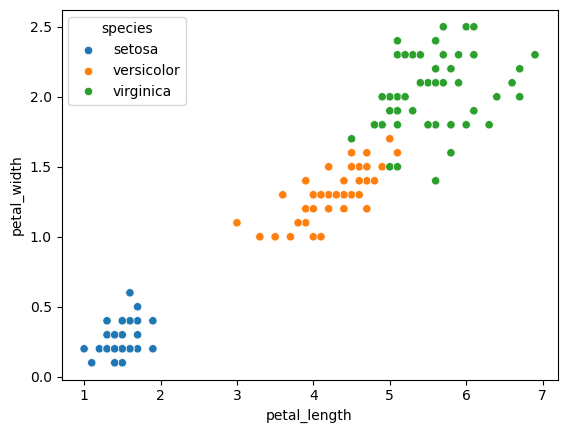

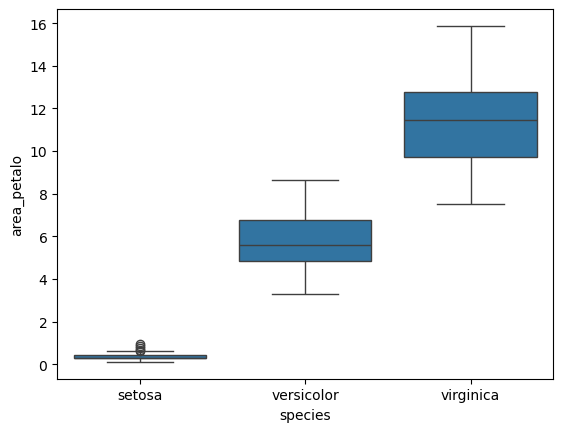

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv"
df = pd.read_csv(url)
df.head()

print(df["species"].value_counts())

medie = df.groupby("species")[["petal_length", "petal_width"]].mean()
print(medie)

sns.scatterplot(data=df, x="petal_length", y="petal_width", hue="species")
plt.show()

df["area_petalo"] = df["petal_length"] * df["petal_width"]

sns.boxplot(data=df, x="species", y="area_petalo")
plt.show()
